### 1.3 국가별 음주 데이터 분석하기 ###

##### 1) 데이터의 기초 정보 살펴보기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "data/data/drinks.csv"
drinks = pd.read_csv(file_path)
print(drinks.info())
drinks.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [2]:
# feature 정리

'''
country : 국가 정보
beer_servings : beer 소비량
spirit_servings : spirit 소비량
wine_servings : wine 소비량
total_litres_of_alcohol : 총 알코올 소비량
continent : 국가의 대륙 정보
'''

'\ncountry : 국가 정보\nbeer_servings : beer 소비량\nspirit_servings : spirit 소비량\nwine_servings : wine 소비량\ntotal_litres_of_alcohol : 총 알코올 소비량\ncontinent : 국가의 대륙 정보\n'

In [3]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


##### 2) 탐색과 시각화 #####

In [4]:
# 두 features('beer_servings', 'wine_servings') 간의 상관 계수 계산

corr = drinks[["beer_servings", "wine_servings"]].corr(method='pearson')
corr

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [5]:
# 모든 features 간의 상관 계수 계산

cols = ["beer_servings", "spirit_servings", "wine_servings", "total_litres_of_pure_alcohol"]
corr = drinks[cols].corr(method = 'pearson')
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


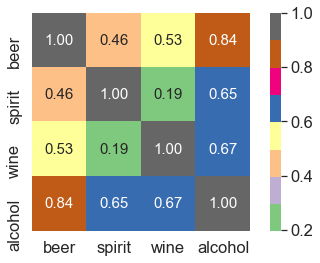

In [6]:
# seaborn 라이브러리의 heatmap 그래프

import seaborn as sns

cols_view = ["beer", "spirit", "wine", "alcohol"]
sns.set(font_scale = 1.5)
heatmap = sns.heatmap(corr.values,
                     cbar = True,
                     annot = True, 
                     square = True,
                      cmap = "Accent",
                     fmt = '.2f',
                     annot_kws = {'size' : 15},
                     yticklabels = cols_view,
                     xticklabels = cols_view)
plt.tight_layout()
plt.show()

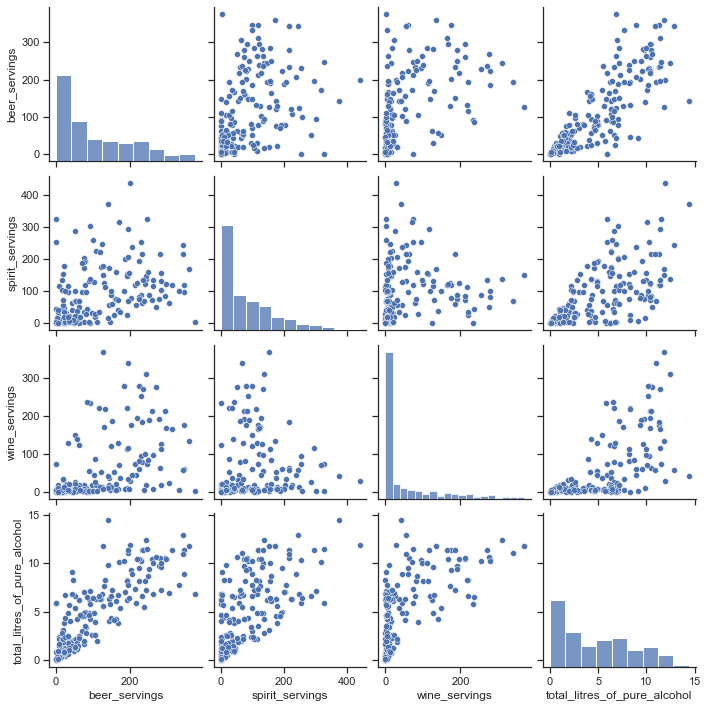

In [7]:
# pairplot 그래프

sns.set(style = 'ticks', context='notebook')
sns.pairplot(drinks[["beer_servings", "spirit_servings", "wine_servings", "total_litres_of_pure_alcohol"]], height=2.5)
plt.show()

##### 3) 스무고개로 개념적 탐색

In [8]:
# continents 의 결측치 처리 - 기타 대륙으로 통합

print("결측치 수 : ", drinks["continent"].isnull().sum())
drinks["continent"] = drinks["continent"].fillna("OT")
print("전처리 후 결측치 수 : ", drinks["continent"].isnull().sum())
drinks.head()

결측치 수 :  23
전처리 후 결측치 수 :  0


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


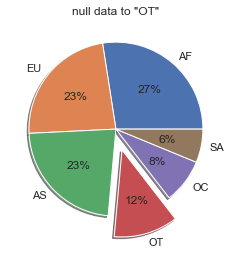

In [9]:
# 파이차트로 대륙 비율 시각화

labels = drinks["continent"].value_counts().index.tolist()
fracs1 = drinks["continent"].value_counts().values.tolist()
explode = (0,0,0,0.25,0,0)

plt.pie(fracs1, explode=explode, labels=labels, autopct="%.0f%%", shadow=True)
plt.title("null data to \"OT\"")
plt.show()

In [10]:
# agg() 함수를 이용해 대륙별로 분석

result = drinks.groupby("continent").spirit_servings.agg(["mean","min","max","sum"])
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


In [11]:
# 전체 평균보다 많은 알코올을 섭취하는 대륙

total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby("continent")["total_litres_of_pure_alcohol"].mean()
continent_over_mean = continent_mean[continent_mean > total_mean]
continent_over_mean

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [12]:
# 평균 beer_servings 가 가장 높은 대륙

beer_continent = drinks.groupby("continent")["beer_servings"].mean().idxmax()
beer_continent

'EU'

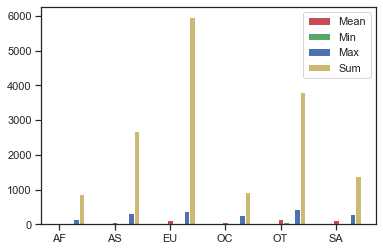

In [13]:
# 시각화

# 대륙별 spirit_servings 의 평균, 최소, 최대, 합계 시각화
n_groups = len(result.index)
means = result["mean"]
mins = result["min"]
maxs = result["max"]
sums = result["sum"]

index = np.arange(n_groups)
bar_width = 0.1

rects1 = plt.bar(index, means, bar_width, color="r", label="Mean")
rects2 = plt.bar(index+bar_width, mins, bar_width, color="g", label="Min")
rects3 = plt.bar(index+bar_width*3, maxs, bar_width, color="b", label="Max")
rects4 = plt.bar(index+bar_width*4, sums, bar_width, color="y", label="Sum")

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

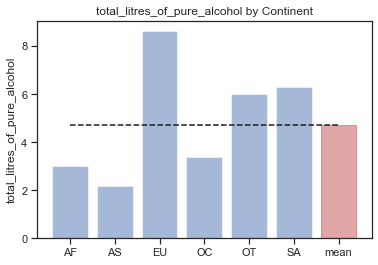

In [14]:
# 대륙별 total_litres_of_pure_alcohol 시각화

continents = continent_mean.index.tolist()
continents.append("mean")
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)

bar_list = plt.bar(x_pos, alcohol, align="center", alpha=0.5)
bar_list[len(continents)-1].set_color("r") # 마지막 막대 red로 색 변경
plt.plot([0.,6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)
plt.ylabel("total_litres_of_pure_alcohol")
plt.title("total_litres_of_pure_alcohol by Continent")

plt.show()

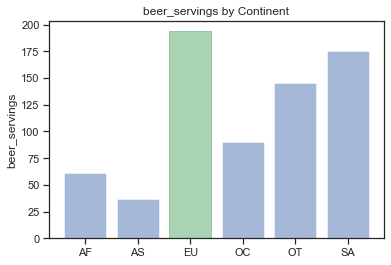

In [15]:
# 대륙별 beer_servings

beer_group = drinks.groupby("continent")["beer_servings"].mean()
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))
alcohol = beer_group.tolist()

bar_list = plt.bar(y_pos, alcohol, align="center", alpha=0.5)
bar_list[continents.index("EU")].set_color("g")
plt.xticks(y_pos, continents)
plt.ylabel("beer_servings")
plt.title("beer_servings by Continent")
plt.show()

##### 4) 통게적 분석 : 분석 대상 간의 통계적 차이 검정

In [16]:
# 아프리카와 유럽 간의 맥주 소비량 차이 검정

africa = drinks[drinks["continent"] == "AF"]
europe = drinks[drinks["continent"] == "EU"]

from scipy import stats

T_test = stats.ttest_ind(africa["beer_servings"], europe["beer_servings"])
T_test_diff = stats.ttest_ind(africa["beer_servings"], europe["beer_servings"], equal_var=False)
print("The t-statistic and p-value assumnig equal variances is %.3f and %.3f." % T_test)
print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f" % T_test_diff)

# 귀무가설 : 두 집단의 평균이 같다 / 대립가설 : 두 집단의 평균은 다르다
# p-value 가 충분히 낮으므로 귀무가설 기각, 대립가설 채택

The t-statistic and p-value assumnig equal variances is -7.268 and 0.000.
The t-statistic and p-value not assuming equal variances is -7.144 and 0.000


In [17]:
# 대한민국은 얼마나 독하게 술을 마시는 나라일까

drinks["total_servings"] = drinks["beer_servings"] + drinks["wine_servings"] + drinks["spirit_servings"]
drinks["alcohol_rate"] = drinks["total_litres_of_pure_alcohol"] / drinks["total_servings"] # 술 소비량 대비 알코올 비율 feature
drinks["alcohol_rate"] = drinks["alcohol_rate"].fillna(0)

# 순위 정보 생성
country_with_rank = drinks[["country", "alcohol_rate"]]
country_with_rank = country_with_rank.sort_values(by=["alcohol_rate"], ascending=False)
country_with_rank.head(5)

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


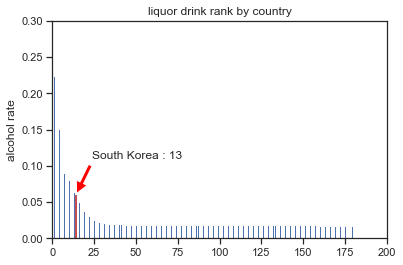

In [29]:
# 국가별 순위 정보 시각화

country_list = country_with_rank["country"].tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank["alcohol_rate"]

bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index("South Korea")].set_color("r")
plt.ylabel("alcohol rate")
plt.title("liquor drink rank by country")
plt.axis([0,200,0,0.3]) #x축 (0,200), y축(0,0.3)

korea_rank = country_list.index("South Korea")
korea_alc_rate = country_with_rank[country_with_rank["country"] == "South Korea"]["alcohol_rate"].values[0]
plt.annotate("South Korea : " + str(korea_rank -1), 
            xy = (korea_rank, korea_alc_rate),
            xytext = (korea_rank + 10, korea_alc_rate + 0.05),
             arrowprops = dict(facecolor="red", shrink=0.05))
plt.show()

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "data/data/drinks.csv"
drinks = pd.read_csv(file_path)
drinks["continent"] = drinks["continent"].fillna("OT")
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [34]:
# 1

wine_mean_by_continent = drinks.groupby("continent")["wine_servings"].mean()
wine_mean_by_continent

continent
AF     16.264151
AS      9.068182
EU    142.222222
OC     35.625000
OT     24.521739
SA     62.416667
Name: wine_servings, dtype: float64

In [43]:
# 2

drinks["total_servings"] = drinks["beer_servings"] + drinks["spirit_servings"] + drinks["wine_servings"]
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319


In [91]:
# 3

alcohol_mean = drinks.groupby("continent").total_litres_of_pure_alcohol.mean()
continent_under = alcohol_mean[alcohol_mean < drinks["total_litres_of_pure_alcohol"].mean()].index.tolist()
df_continent_under = drinks.loc[drinks["continent"].isin(continent_under)]
df_continent_under.sort_values(by="spirit_servings", ascending=False).head(1)["country"]

141    Russian Federation
Name: country, dtype: object

In [97]:
# 4

drinks["ratio_alcohol"] = drinks["total_litres_of_pure_alcohol"] / drinks["total_servings"]
drinks[drinks["country"] == "South Korea"].ratio_alcohol

138    0.059394
Name: ratio_alcohol, dtype: float64

In [103]:
# 5

ratio_alcohol = drinks.groupby("continent")[["total_servings", "total_litres_of_pure_alcohol"]].mean()
ratio_alcohol["ratio"] = ratio_alcohol["total_litres_of_pure_alcohol"] / ratio_alcohol["total_servings"]
ratio_alcohol.head()

,total_servings,total_litres_of_pure_alcohol,ratio
continent,,,
AF,94.075472,3.007547,0.031970
AS,106.954545,2.170455,0.020293
EU,468.555556,8.617778,0.018392
OC,183.750000,3.381250,0.018401
OT,335.695652,5.995652,0.017860
